## CANCER CLASSIFIER FROM GENEOME

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### DATA

Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.

In [2]:
df = pd.read_csv("../DATA/gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
warnings.simplefilter(action = "ignore", category= FutureWarning)
warnings.simplefilter(action = "ignore", category= UserWarning)

**Data Visualization**

<Axes: xlabel='Gene One', ylabel='Gene Two'>

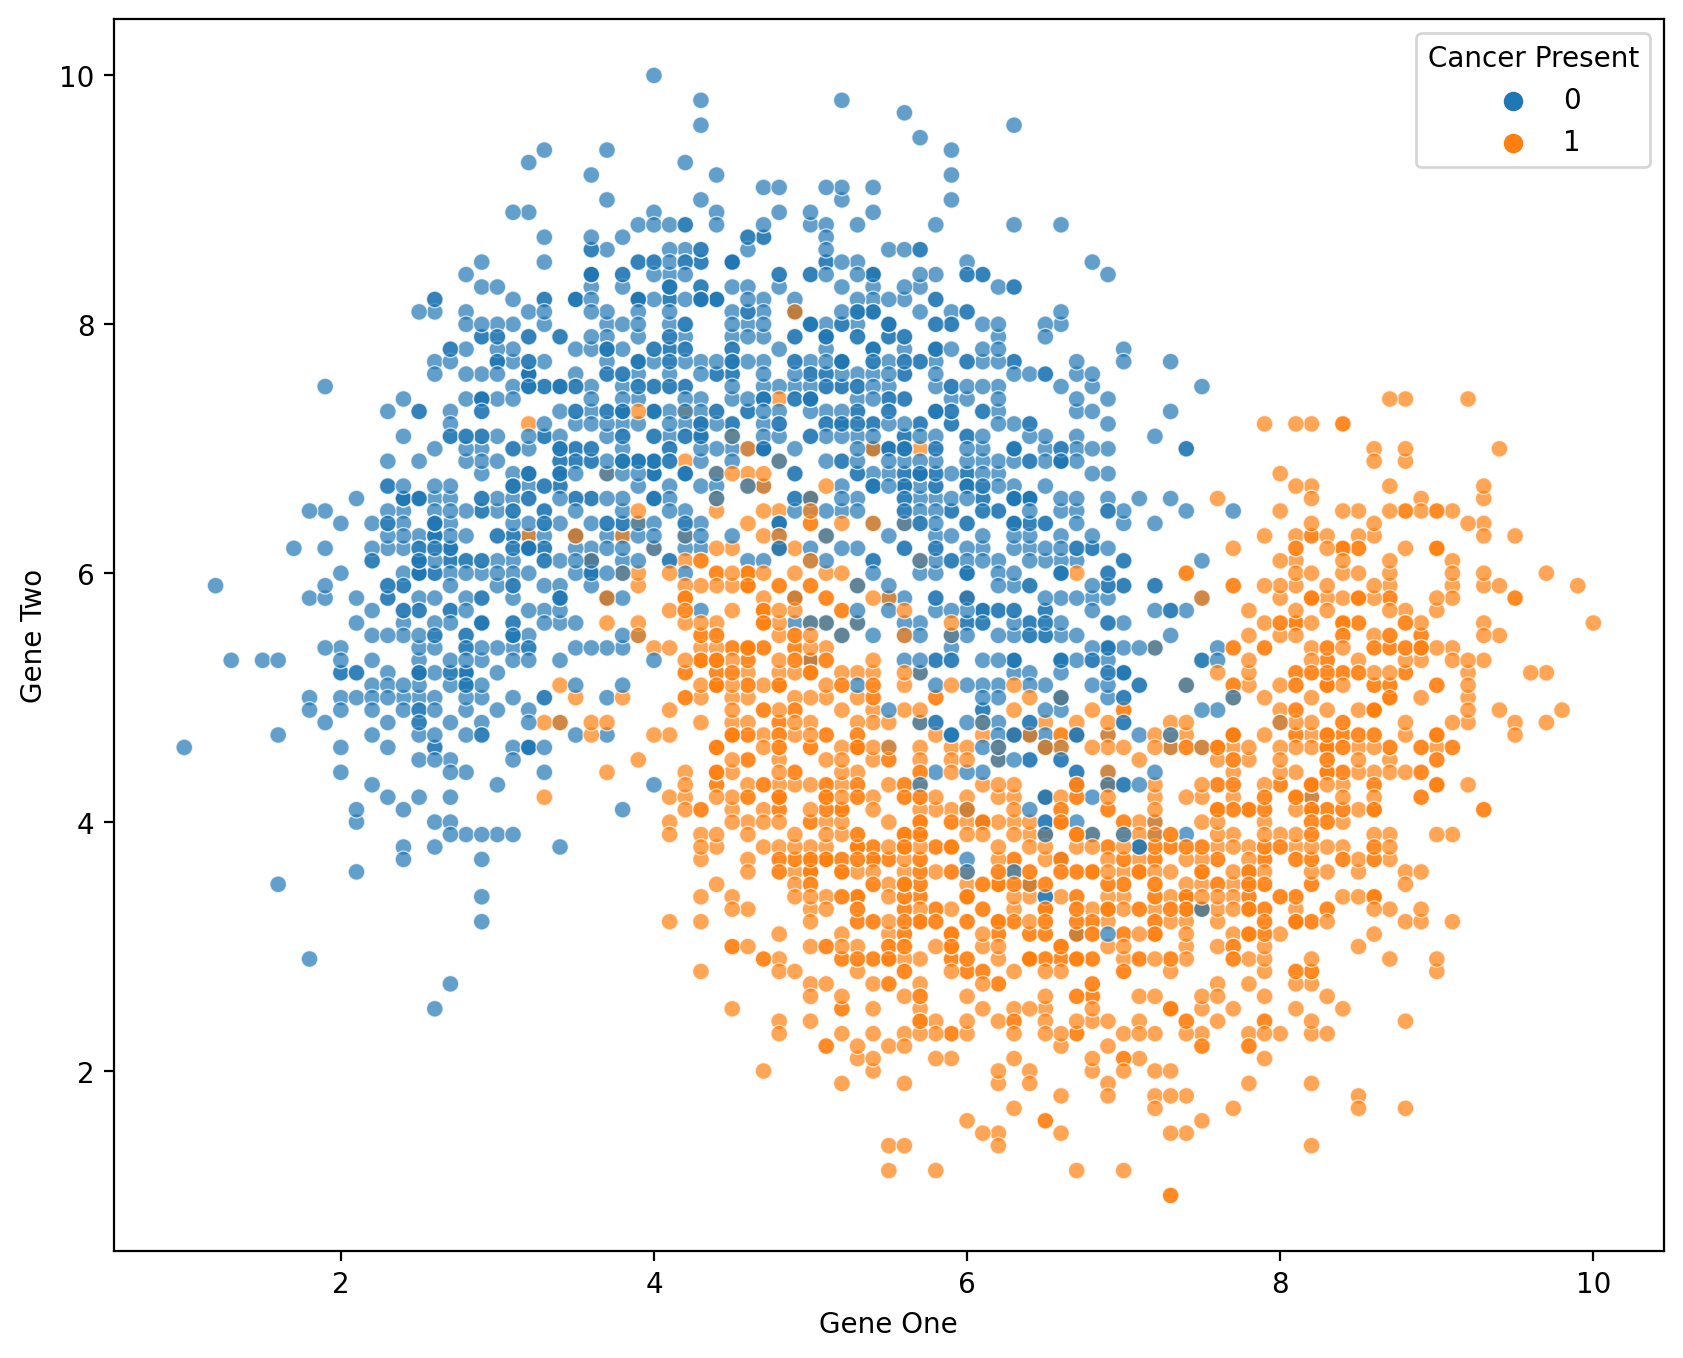

In [6]:
plt.figure(figsize= (10,8), dpi = 200)
sns.scatterplot(x = "Gene One", y = "Gene Two", data = df, hue = "Cancer Present", alpha = 0.7)

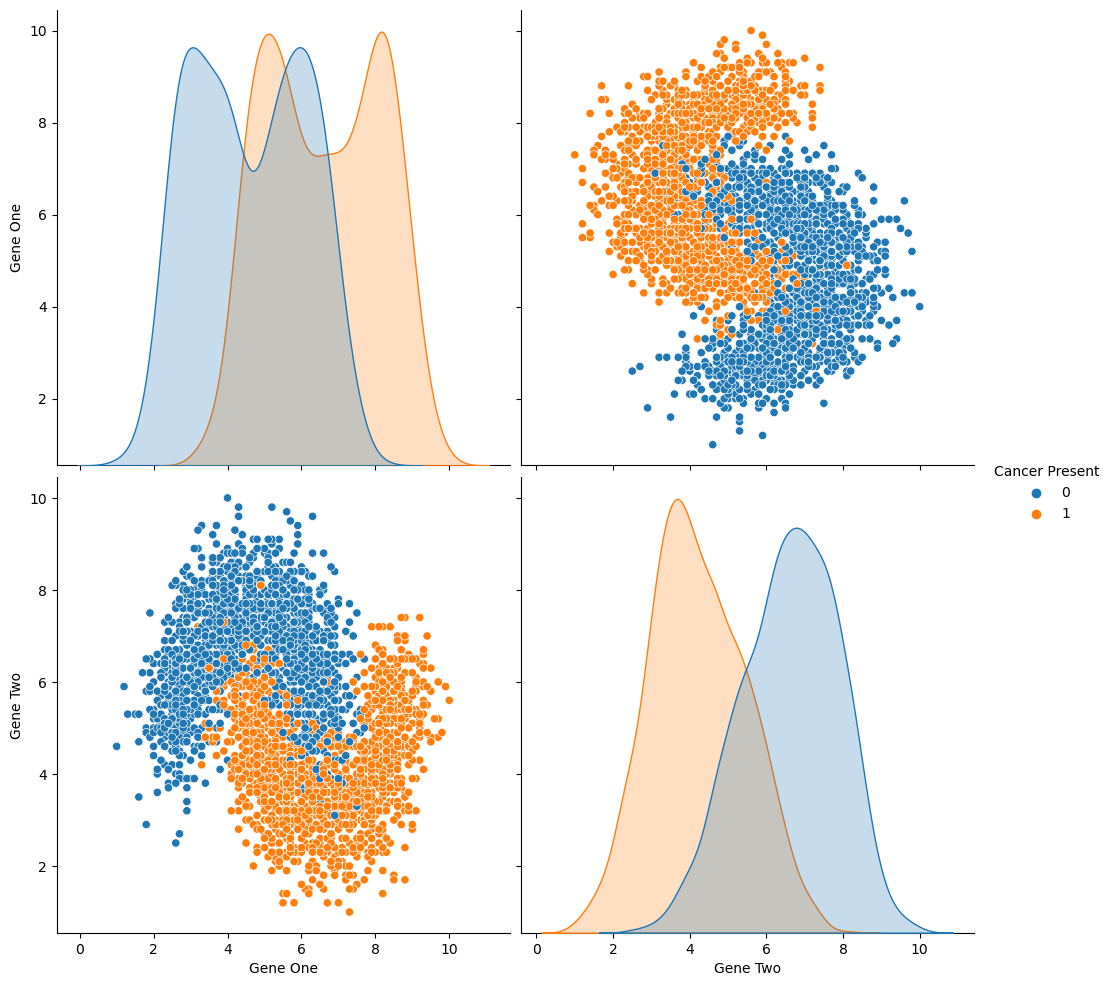

In [7]:
sns.pairplot(data = df, hue = "Cancer Present", size = 5)

**Scikit-Learn imports**

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[ 0.4441672 ,  0.7149185 ],
       [-0.21108473, -1.66786641],
       [-0.64791935, -0.85423254],
       ...,
       [-0.10187607, -0.97046595],
       [-0.04727175,  1.06361873],
       [ 1.70006673, -0.21494878]])

**KNN model**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Predictions and Evaluation**

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [18]:
prediction = knn_model.predict(X_test)

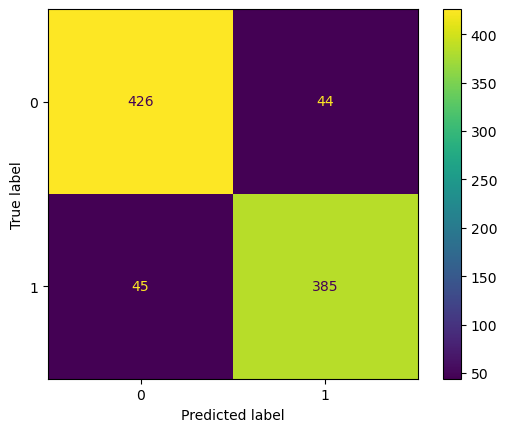

In [19]:
matrix = confusion_matrix(y_test, prediction)
heatmap = ConfusionMatrixDisplay(matrix)
heatmap.plot()

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



**90% accuracy with an F1-score of 91%**

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
test_error = []

for k in range (1,30):
    km = KNeighborsClassifier(n_neighbors=k)
    km.fit(X_train, y_train)
    pred = km.predict(X_test)
    test_error.append(1 - accuracy_score(y_test, pred))
    

Text(0.5, 1.0, 'Elbow method\n')

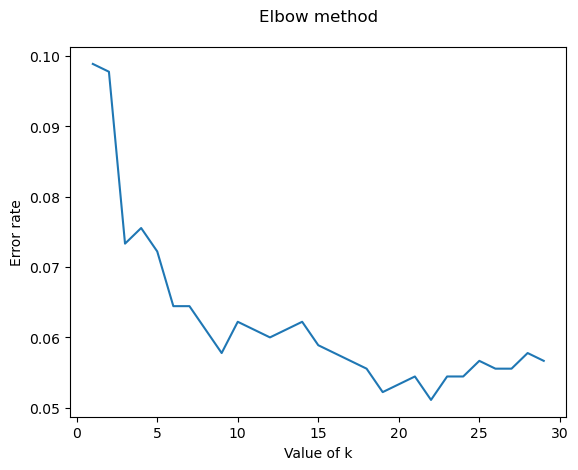

In [23]:
plt.plot(range(1,30), test_error)
plt.ylabel("Error rate")
plt.xlabel("Value of k")
plt.title("Elbow method\n")

# Pipeline 
for grid search CV

In [24]:
scaler = StandardScaler()

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

keep the keys with the same name as the model or scaler as a list of tuple

In [27]:
operations = [("scaler", scaler), ("knn", knn)]

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipe = Pipeline(steps = operations)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
k_values = list(range(1,20))



since we are passing the pipeline inside the GridSearch obj, we have to specify the parameter grid to look
for n_neighbors inside knn,


model_key + "__" + parameter


eg: n_neighbors --> knn__n_neigbhbors

In [32]:
parameter_grid = {"knn__n_neighbors": k_values}

In [33]:
full_cv_classifier = GridSearchCV(pipe, param_grid = parameter_grid, scoring="accuracy", cv = 5)

In [34]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [35]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [36]:
predictions = full_cv_classifier.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

